PlainText:


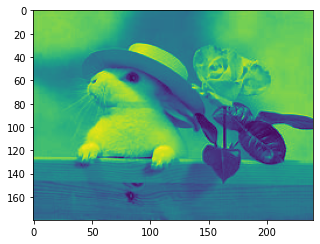

Key:


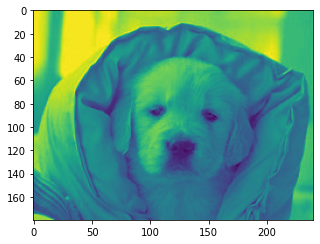

(180, 240)


In [ ]:
import numpy as np
import PIL
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

def imageImport(file):
    img = PIL.Image.open(file)
    gray_img = img.convert("L")
    # print(gray_img.size)
    imgArr = np.array(gray_img)
    return imgArr

keyImage = imageImport('KOP.jpg')
matrix=imageImport('OIP.jpg')

print("PlainText:")
plt.imshow(matrix)
plt.show()
rows, columns = matrix.shape
rowkey, colkey = keyImage.shape

print("Key:")
plt.imshow(keyImage)
plt.show()
print(keyImage.shape)





(180, 240)


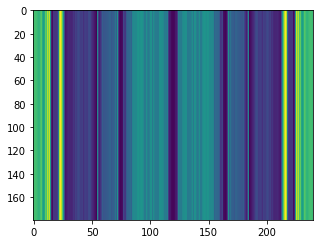

In [ ]:
def keygen(intakeImage):
  keyMat_row, keyMat_col = intakeImage.shape
  first_row = intakeImage[0]
  first_row_rev = first_row[::-1]
  res_key = np.zeros(shape = (keyMat_row,keyMat_col))
  print(res_key.shape)
  for i in range(0,(keyMat_row)):
    res_key[i] = first_row ^ first_row_rev
  plt.imshow(res_key)
  return res_key

resultant_key = keygen(keyImage)


(43200,) (43200,)
[[ 32  31  28 ...  29  30  28]
 [181 181 184 ... 163 160 163]
 [169 169 172 ... 167 164 165]
 ...
 [ 28  26  24 ...  22  24  22]
 [ 28  26  24 ...  22  23  22]
 [ 30  28  26 ...  23  24  23]]
[[ 32  31  28 ...  29  30  28]
 [ 30  28  26 ...  23  24  23]
 [ 28  26  24 ...  22  23  22]
 ...
 [162 163 165 ... 172 167 167]
 [169 169 172 ... 167 164 165]
 [181 181 184 ... 163 160 163]]
Encrypted Image:


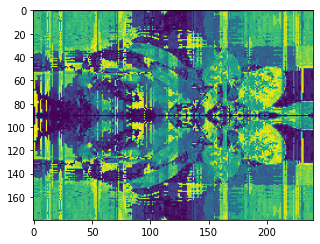

In [ ]:
def encryption(plaintext,key):

  matrix=plaintext.flatten()
  
  keyImage= key.flatten()
  keyImage = keyImage.astype(int)
  additiveImage=[]
  for i in range(0,len(matrix)):
    temp = matrix[i]+keyImage[i]
    if temp>255:
      temp=temp%255
    additiveImage.append(temp)
    temp=0
  print(matrix.shape,keyImage.shape)

  newImage = np.array(additiveImage)
  Deflattened = np.reshape(newImage, (rowkey, colkey))

  encrypted=np.zeros((rowkey,colkey),dtype=int)
  
  encrypted[0]=Deflattened[0]
  
  for i in range(0,rowkey-1):
    encrypted[i+1]=Deflattened[rowkey-1-i]
  
  print(encrypted)
  print(Deflattened)

  xoredmatrix = encrypted ^ Deflattened

  print("Encrypted Image:")
  plt.imshow(xoredmatrix)
  plt.show()
  return xoredmatrix,Deflattened

xoredmatrix,imageform = encryption(matrix,resultant_key)  

Decrypted Plaintext:


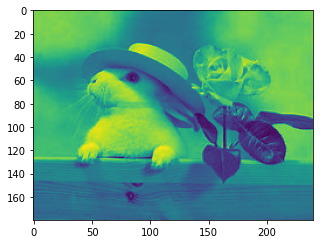

In [ ]:
def decryption(cipher,imageform,keyImage):
  postxor=cipher^imageform
  decrypted=np.zeros((rowkey,colkey),dtype=int)

  decrypted[0]=postxor[0]

  for i in range(0,rowkey-1):
    decrypted[rowkey-1-i]=postxor[i+1]

  matrix=decrypted.flatten()
  keyImage= keyImage.flatten()

  subrtactiveImage=[]
  for i in range(0,len(matrix)):
     temp = matrix[i]-keyImage[i]
     if temp<0:
       temp=temp%255
     subrtactiveImage.append(temp)
     temp=0


  newImage = np.array(subrtactiveImage)
  Deflattened = np.reshape(newImage, (rowkey, colkey))

  print("Decrypted Plaintext:")
  plt.imshow(Deflattened)
  plt.show()
  return Deflattened

decryptedmatrix=decryption(xoredmatrix,imageform,resultant_key)

